In [6]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
color_pal=sns.color_palette()
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [7]:
df=pd.read_csv('product c_basemodel.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [8]:
sales_c= df.drop(['Product Name','Product Category','Month','Year'],axis=1)

In [9]:
sales_c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sales         60 non-null     int64  
 1   SMA_12months  48 non-null     float64
 2   SMA_6months   54 non-null     float64
 3   SMA_3months   57 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.3 KB


In [10]:
sales_c.head()

,Sales,SMA_12months,SMA_6months,SMA_3months
Month-Year,,,,
2019-01-01,496334,NaN,NaN,NaN
2019-02-01,306455,NaN,NaN,NaN
2019-03-01,476270,NaN,NaN,NaN
2019-04-01,628463,NaN,NaN,426353.0
2019-05-01,366750,NaN,NaN,470396.0


<Axes: title={'center': 'Product C'}, xlabel='Month-Year'>

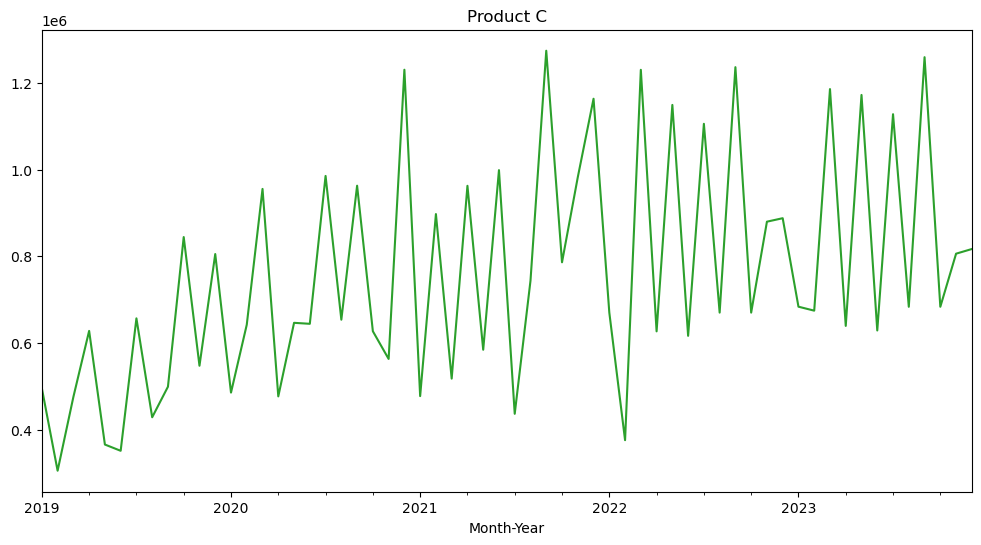

In [11]:
sales_c['Sales'].plot(figsize=(12,6),color=color_pal[2],title='Product C')

In [12]:
test_3= sales_c['Sales'].iloc[57:]
test_6=sales_c['Sales'].iloc[54:]
test_12=sales_c['Sales'].iloc[48:]

In [13]:
pred_3=sales_c['SMA_3months'].iloc[57:]
pred_6=sales_c['SMA_6months'].iloc[54:]
pred_12=sales_c['SMA_12months'].iloc[48:]

In [14]:
mae_3= mean_absolute_error(test_3,pred_3)
mse_3=mean_squared_error(test_3,pred_3)
mape_3= mean_absolute_percentage_error(test_3,pred_3)
rmse_3= np.sqrt(mean_squared_error(test_3,pred_3))

print(f'MAE - Simple Moving Averages_3 months: {mae_3:0.3f}')
print(f'MAPE - Simple Moving Averages_3 months: {mape_3:0.3f}')
print(f'MSE - Simple Moving Averages_3 months: {mse_3:0.3f}')
print(f'RMSE - Simple Moving Averages_3 months: {rmse_3:0.3f}')

MAE - Simple Moving Averages_3 months: 265046.667
MAPE - Simple Moving Averages_3 months: 0.352
MSE - Simple Moving Averages_3 months: 74390083387.333
RMSE - Simple Moving Averages_3 months: 272745.455


In [15]:
mae_6= mean_absolute_error(test_6,pred_6)
mse_6=mean_squared_error(test_6,pred_6)
mape_6= mean_absolute_percentage_error(test_6,pred_6)
rmse_6= np.sqrt(mean_squared_error(test_6,pred_6))

print(f'MAE - Simple Moving Averages_6 months: {mae_6:0.3f}')
print(f'MAPE - Simple Moving Averages_6 months: {mape_6:0.3f}')
print(f'MSE - Simple Moving Averages_6 months: {mse_6:0.3f}')
print(f'RMSE - Simple Moving Averages_6 months: {rmse_6:0.3f}')

MAE - Simple Moving Averages_6 months: 175844.167
MAPE - Simple Moving Averages_6 months: 0.185
MSE - Simple Moving Averages_6 months: 47237073409.167
RMSE - Simple Moving Averages_6 months: 217340.915


In [16]:
mae_12= mean_absolute_error(test_12,pred_12)
mse_12=mean_squared_error(test_12,pred_12)
mape_12= mean_absolute_percentage_error(test_12,pred_12)
rmse_12= np.sqrt(mean_squared_error(test_12,pred_12))

print(f'MAE - Simple Moving Averages_12 months: {mae_12:0.3f}')
print(f'MAPE - Simple Moving Averages_12 months: {mape_12:0.3f}')
print(f'MSE - Simple Moving Averages_12 months: {mse_12:0.3f}')
print(f'RMSE - Simple Moving Averages_12 months: {rmse_12:0.3f}')

MAE - Simple Moving Averages_12 months: 206608.917
MAPE - Simple Moving Averages_12 months: 0.243
MSE - Simple Moving Averages_12 months: 49888219762.250
RMSE - Simple Moving Averages_12 months: 223356.710


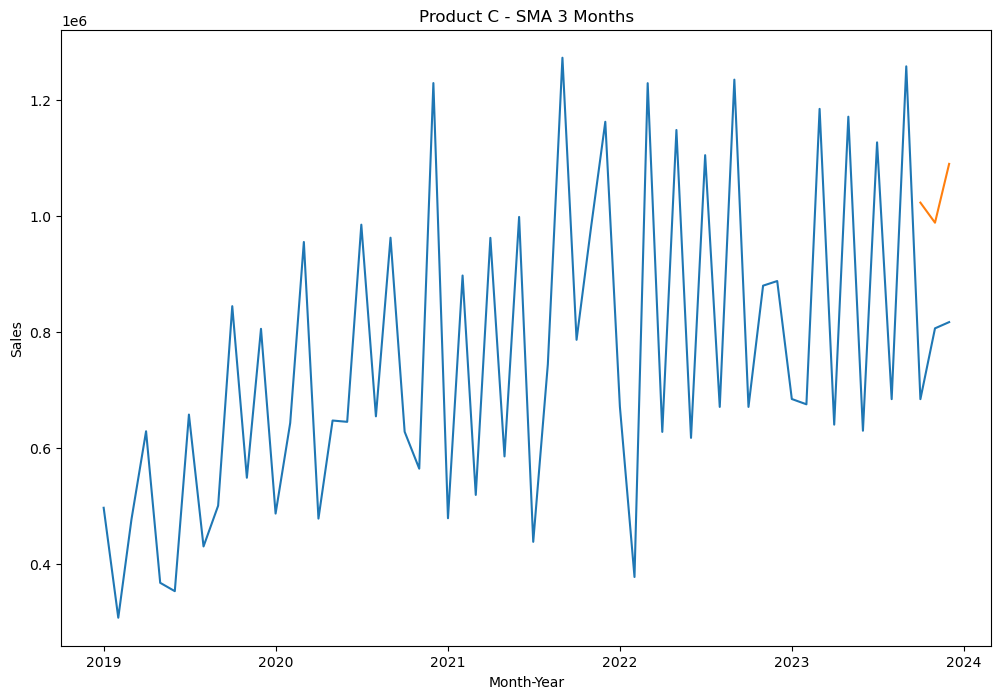

In [17]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c['Sales'])
sns.lineplot(pred_3)
plt.title('Product C - SMA 3 Months')
plt.show()

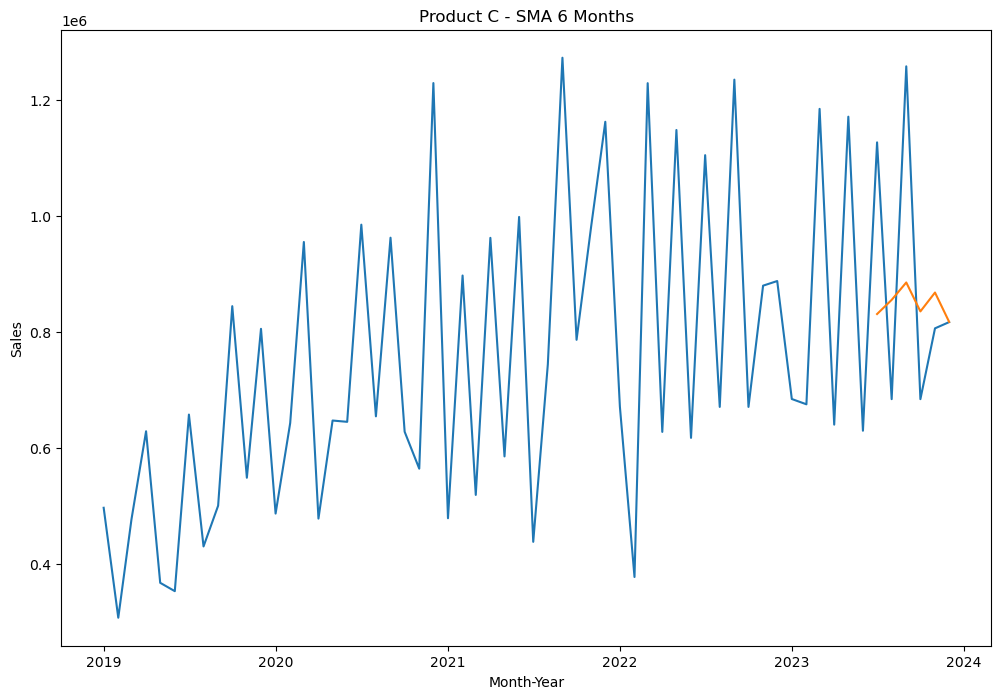

In [18]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c['Sales'])
sns.lineplot(pred_6)
plt.title('Product C - SMA 6 Months')
plt.show()

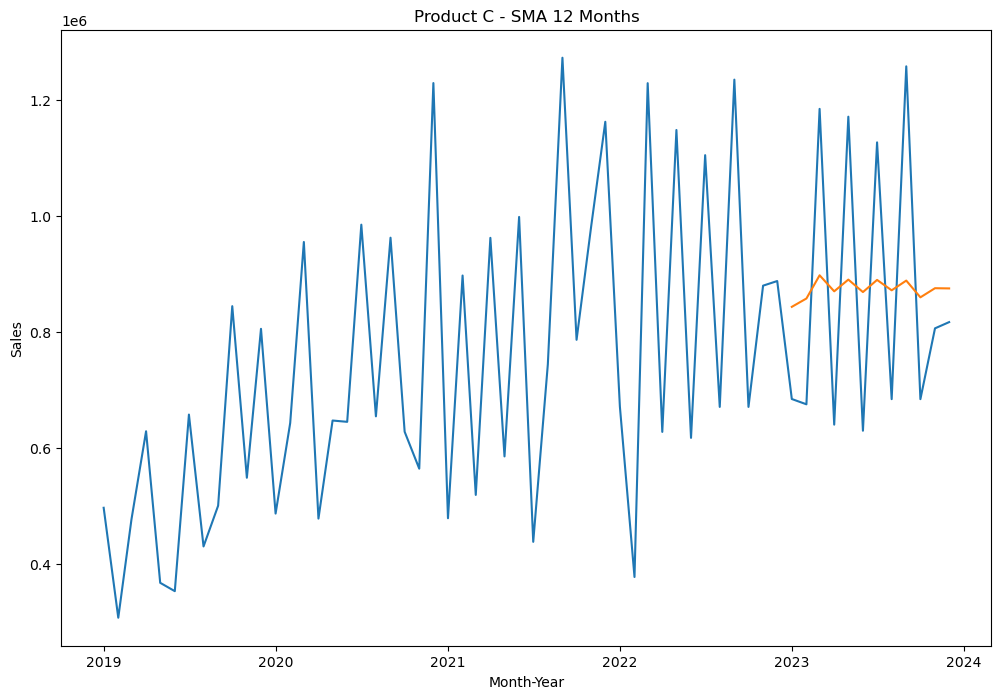

In [19]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c['Sales'])
sns.lineplot(pred_12)
plt.title('Product C - SMA 12 Months')
plt.show()

In [20]:
SALES_C=  df.drop(['Product Name','Product Category','Month','Year', 'SMA_12months','SMA_6months','SMA_3months'],axis=1)

In [21]:
TRAIN=SALES_C[:48]

In [22]:
# Calculate the 12-month moving average for the last 12 months
sma_12 = TRAIN.rolling(window=12).mean().iloc[-1]

In [23]:
# Initialize a list to hold your predictions
predictions = [sma_12]

# Generate predictions for the next 12 months
for i in range(11):
    # Add the most recent prediction to the sales data
    TRAIN= TRAIN.append(predictions[-1])
    
    # Calculate the new moving average and add it to the predictions list
    predictions.append(TRAIN.rolling(window=12).mean().iloc[-1])

# Convert predictions to an array
# Convert predictions to an array
predictions = np.array(predictions)

# Print the predictions
print(predictions)

[[843362.        ]
 [857745.5       ]
 [897825.04166667]
 [870174.04513889]
 [890407.29890046]
 [868875.82380883]
 [889860.55912624]
 [871906.68905342]
 [888688.57980788]
 [859767.46145853]
 [875537.74991341]
 [875172.22907286]]


C:\Users\Maaz\AppData\Local\Temp\ipykernel_16660\267905979.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_16660\267905979.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_16660\267905979.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_16660\267905979.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_16660\267

In [24]:
TEST=SALES_C[48:]
TEST['Predictions']=predictions

C:\Users\Maaz\AppData\Local\Temp\ipykernel_16660\136828585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEST['Predictions']=predictions


In [25]:
_mae_12= mean_absolute_error(TEST['Sales'],TEST['Predictions'])
_mse_12=mean_squared_error(TEST['Sales'],TEST['Predictions'])
_mape_12= mean_absolute_percentage_error(TEST['Sales'],TEST['Predictions'])
_rmse_12= np.sqrt(mean_squared_error(TEST['Sales'],TEST['Predictions']))

print(f'MAE - Moving Averages_12 months: {_mae_12:0.3f}')
print(f'MAPE - Moving Averages_12 months: {_mape_12:0.3f}')
print(f'MSE - Moving Averages_12 months: {_mse_12:0.3f}')
print(f'RMSE - Moving Averages_12 months: {_rmse_12:0.3f}')

MAE - Moving Averages_12 months: 206608.918
MAPE - Moving Averages_12 months: 0.243
MSE - Moving Averages_12 months: 49888229707.412
RMSE - Moving Averages_12 months: 223356.732


In [37]:
TEST

,Sales,Predictions
Month-Year,,
2023-01-01,684175,843362.000000
2023-02-01,675038,857745.500000
2023-03-01,1185258,897825.041667
2023-04-01,639923,870174.045139
2023-05-01,1171761,890407.298900
2023-06-01,629400,868875.823809
2023-07-01,1127413,889860.559126
2023-08-01,683935,871906.689053
2023-09-01,1258717,888688.579808


In [26]:
TRAIN_6=SALES_C[:54]

# Calculate the 6-month moving average for the last 6 months
sma_6 = TRAIN_6.rolling(window=6).mean().iloc[-1]

In [27]:
# Initialize a list to hold your predictions
predictions_6 = [sma_6]

# Generate predictions for the next 6 months
for i in range(5):
    # Add the most recent prediction to the sales data
    TRAIN_6= TRAIN_6.append(predictions_6[-1])
    
    # Calculate the new moving average and add it to the predictions list
    predictions_6.append(TRAIN_6.rolling(window=6).mean().iloc[-1])

# Convert predictions to an array
# Convert predictions to an array
predictions_6 = np.array(predictions_6)

# Print the predictions
print(predictions_6)

[[830925.83333333]
 [855384.30555556]
 [885442.02314815]
 [835472.69367284]
 [868064.30928498]
 [817448.19416581]]


C:\Users\Maaz\AppData\Local\Temp\ipykernel_16660\135217546.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_16660\135217546.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_16660\135217546.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_16660\135217546.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Local\

In [28]:
TEST_6=SALES_C[54:]
TEST_6['Predictions_6']=predictions_6

C:\Users\Maaz\AppData\Local\Temp\ipykernel_16660\3365118040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEST_6['Predictions_6']=predictions_6


In [29]:
_mae_6= mean_absolute_error(TEST_6['Sales'],TEST_6['Predictions_6'])
_mse_6=mean_squared_error(TEST_6['Sales'],TEST_6['Predictions_6'])
_mape_6= mean_absolute_percentage_error(TEST_6['Sales'],TEST_6['Predictions_6'])
_rmse_6= np.sqrt(mean_squared_error(TEST_6['Sales'],TEST_6['Predictions_6']))

print(f'MAE - Moving Averages_6 months: {_mae_6:0.3f}')
print(f'MAPE - Moving Averages_6 months: {_mape_6:0.3f}')
print(f'MSE - Moving Averages_6 months: {_mse_6:0.3f}')
print(f'RMSE - Moving Averages_6 months: {_rmse_6:0.3f}')

MAE - Moving Averages_6 months: 175844.274
MAPE - Moving Averages_6 months: 0.185
MSE - Moving Averages_6 months: 47237095395.945
RMSE - Moving Averages_6 months: 217340.966


In [35]:
TEST_6

,Sales,Predictions_6
Month-Year,,
2023-07-01,1127413,830925.833333
2023-08-01,683935,855384.305556
2023-09-01,1258717,885442.023148
2023-10-01,683935,835472.693673
2023-11-01,806218,868064.309285
2023-12-01,816978,817448.194166


In [30]:
TRAIN_3=SALES_C[:57]

# Calculate the 3-month moving average for the last 3 months
sma_3 = TRAIN_3.rolling(window=3).mean().iloc[-1]

In [31]:
# Initialize a list to hold your predictions
predictions_3 = [sma_3]

# Generate predictions 
for i in range(2):
    # Add the most recent prediction to the sales data
    TRAIN_3= TRAIN_3.append(predictions_3[-1])
    
    # Calculate the new moving average and add it to the predictions list
    predictions_3.append(TRAIN_3.rolling(window=3).mean().iloc[-1])

# Convert predictions to an array
# Convert predictions to an array
predictions_3 = np.array(predictions_3)

# Print the predictions
print(predictions_3)

[[1023355.]
 [ 988669.]
 [1090247.]]


C:\Users\Maaz\AppData\Local\Temp\ipykernel_16660\3984739376.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_3= TRAIN_3.append(predictions_3[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_16660\3984739376.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_3= TRAIN_3.append(predictions_3[-1])


In [32]:
TEST_3=SALES_C[57:]
TEST_3['Predictions_3']=predictions_3

C:\Users\Maaz\AppData\Local\Temp\ipykernel_16660\3722325560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEST_3['Predictions_3']=predictions_3


In [33]:
_mae_3= mean_absolute_error(TEST_3['Sales'],TEST_3['Predictions_3'])
_mse_3=mean_squared_error(TEST_3['Sales'],TEST_3['Predictions_3'])
_mape_3= mean_absolute_percentage_error(TEST_3['Sales'],TEST_3['Predictions_3'])
_rmse_3= np.sqrt(mean_squared_error(TEST_3['Sales'],TEST_3['Predictions_3']))

print(f'MAE - Simple Moving Averages_3 months: {_mae_3:0.3f}')
print(f'MAPE - Simple Moving Averages_3 months: {_mape_3:0.3f}')
print(f'MSE - Simple Moving Averages_3 months: {_mse_3:0.3f}')
print(f'RMSE - Simple Moving Averages_3 months: {_rmse_3:0.3f}')

MAE - Simple Moving Averages_3 months: 265046.667
MAPE - Simple Moving Averages_3 months: 0.352
MSE - Simple Moving Averages_3 months: 74390083387.333
RMSE - Simple Moving Averages_3 months: 272745.455


In [34]:
TEST_3

,Sales,Predictions_3
Month-Year,,
2023-10-01,683935,1023355.0
2023-11-01,806218,988669.0
2023-12-01,816978,1090247.0
